#Perceptron Solution Code For HW2
 We will write code to make and train a linear perceptron [which is used as a Binary classifier] to classify our flowers into Roses and Daisies (Red and Yellow). The following steps will be followed


##Step 1: Preparing the dataset and plotting the initial decision boundary and data points.



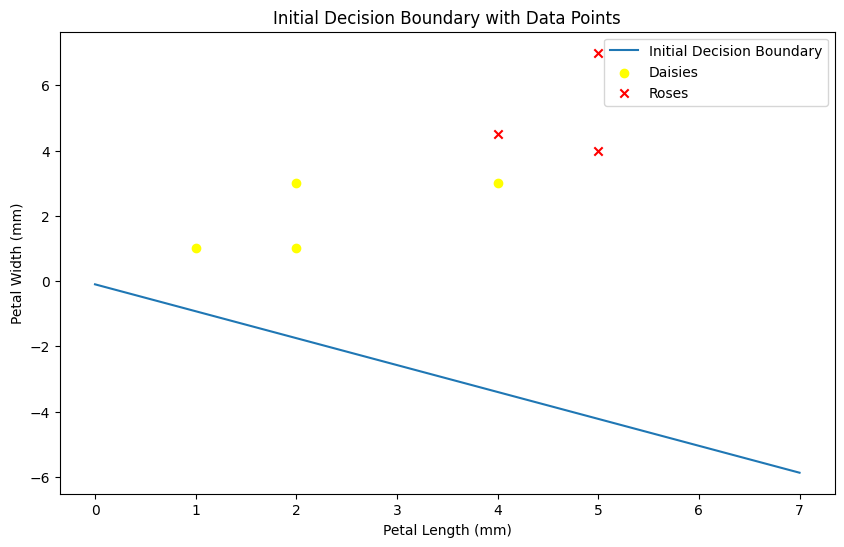

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Import or Define the training dataset
#for this case we can simply define the training dataset and we don't need
#to define a test dataset

data = np.array([
    [5, 4, 1],  # roses
    [4, 3, 0],  # daisy
    [2, 1, 0],  # daisy
    [1, 1, 0],  # daisy
    [4, 4.5, 1], # roses
    [2, 3, 0],  # daisy
    [5, 7, 1]   # roses
])

# Separating features and labels
X = data[:, :2]  # petal length and width (we use a slicing operation to take all rows but only the first two columns from data)
y = data[:, 2]   # flower type (roses=1, daisy=0) (we use a slicing operation to take all rows but only third column(or indexed 2 in a zero index array) from data)

# Adding bias term to the feature vector
X_bias = np.c_[np.ones(X.shape[0]), X] #concat an array of ones to our X (input array)

# Initialize weights randomly (produces an array with three random weights)
weights = np.random.rand(3)

# Function to calculate decision boundary
#A simple linear plotting function if you look closely
#(ax+by+c-> y = -(c+a*x)/b) (#template idea : x is not given)
def decision_boundary(x, weights):
    return -(weights[0] + weights[1] * x) / weights[2]

# Plotting initial decision boundary line and our training data points
x_values = np.linspace(0, 7, 100)
#Hint: due to versatility that is brought because of using numpy decision_boundary
#can take in as input an array or a single value -> the output value will change accordingly
y_values = decision_boundary(x_values, weights) #(#template idea)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label="Initial Decision Boundary")
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='yellow', marker='o', label='Daisies') #choose x with corresponding value in y matrix to be equal to 0
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', marker='x', label='Roses') #choose x with corresponding value in y matrix to be equal to 0
plt.xlabel('Petal Length (mm)')
plt.ylabel('Petal Width (mm)')
plt.title('Initial Decision Boundary with Data Points')
plt.legend()
plt.show()


##Preparing Dataset
It is commonly cleaned (data preprocessing) and divided into two components -> Test and Train data. We can use sklearn.model_selection to do it for a large dataset for info please refer to the documentation

(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

But for this case we can simply the training dataset and we don't need test dataset.

##Why do we need the bias term in each feature vector? (X->X_bias)
To allow our decision boundary to be shifted away from the origin. If we don't use it our decision boundary would always pass through the origin, limiting our perceptron

##Train the perceptron using the provided dataset


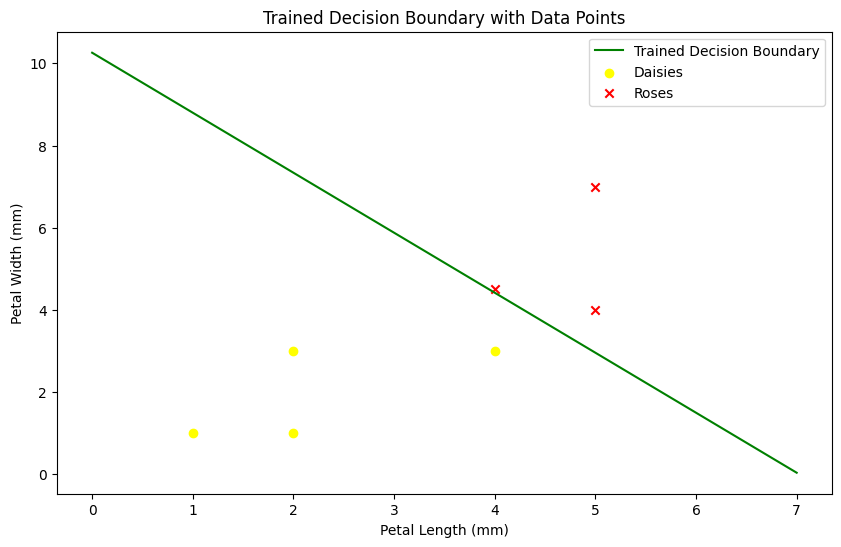

array([-0.24444286,  0.03478454,  0.02382623])

In [ ]:
def threshold_function(X, weights):
    return np.dot(X, weights) >= 0  #(#template idea)

def train_perceptron(X, y, alpha, epochs):
    weights = np.random.rand(X.shape[1])

    for epoch in range(epochs):
        for i in range(X.shape[0]):
            # Get the prediction from the activation function
            prediction = threshold_function(X[i], weights)
            # Perceptron update rule
            weights = weights + alpha * (y[i] - prediction) * X[i]   #(#template idea)

    return weights


# Training the perceptron
alpha = 0.01  # Learning rate
epochs = 100  # Number of epochs/iterations for training
trained_weights = train_perceptron(X_bias, y, alpha, epochs)  #(#template idea)

# Plotting new decision boundary and data points after training
y_values_trained = decision_boundary(x_values, trained_weights)  #(#template idea)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values_trained, label="Trained Decision Boundary", color='green')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='yellow', marker='o', label='Daisies')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', marker='x', label='Roses')
plt.xlabel('Petal Length (mm)')
plt.ylabel('Petal Width (mm)')
plt.title('Trained Decision Boundary with Data Points')
plt.legend()
plt.show()

trained_weights


#Predicting and defining misclassified points

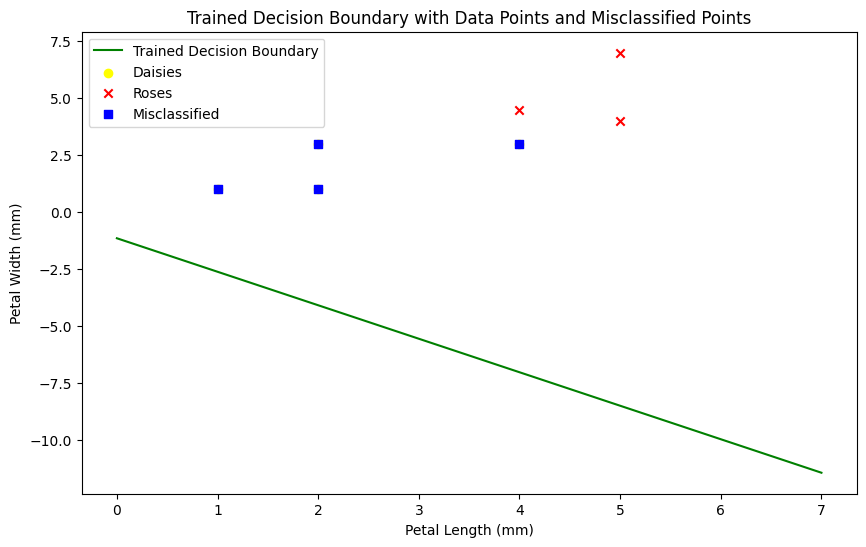

The misclassified points are : 


In [ ]:
# Function to predict the class
def predict(X, weights):
    """
    Predict the class of each sample in X. Added for modularity and understanding the steps (otherwise we could use the threshold function defined above)
    Another idea : can use threshold function internally.
    Function arguments:
    X: A numpy array of data points, where each row is a sample and each column is a feature.
    weights: A numpy array of weights for the perceptron model.

    Returns:
    A numpy array of predicted classes (0 or 1) for each sample.
    """

    # Calculate the dot product of X and weights and check if each result is >= 0
    return np.dot(X, weights) >= 0 #(#template idea)

# Use the trained weights to make predictions on the dataset
predictions = predict(X_bias, trained_weights)

# Identify which points were incorrectly classified
misclassification_mask = predictions!= y # Create a boolean array for misclassification
filtered_points = X[misclassification_mask] #Apply the boolean array to filter X
misclassified_points = filtered_points #: define the misclassified points

# Start plotting
plt.figure(figsize=(10, 6))

# Plot the decision boundary after training
plt.plot(x_values, y_values_trained, label="Trained Decision Boundary", color='green')

# Plot daisies (label 0) as yellow circles
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='yellow', marker='o', label='Daisies')

# Plot roses (label 1) as red crosses
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', marker='x', label='Roses')

# If there are any misclassified points, plot them as blue squares
if misclassified_points.size > 0:
    plt.scatter(misclassified_points[:, 0], misclassified_points[:, 1], color='blue', marker='s', label='Misclassified')

# Setting plot labels and title
plt.xlabel('Petal Length (mm)')
plt.ylabel('Petal Width (mm)')
plt.title('Trained Decision Boundary with Data Points and Misclassified Points')

# Adding a legend to the plot
plt.legend()

# Display the plot
plt.show()

# Output the coordinates of misclassified points
print("The misclassified points are : ")
if misclassified_points.size > 0:
  misclassified_points
else:
  print("None")

